# Decision Tree Regressor

A decision tree is a decision support tool that uses a tree-like model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility. It is one way to display an algorithm that only contains conditional control statements.

Hierarchy of if/else questions >>>> final decision
Tree has no ability to generate new responses, outside of what seen in the training data
Control complexity: pre-prunning parameters (max_depth, max_leaf_nodes, min_samples_leaf)
Resulting model easily visualized
There is no need of scaling of the data(invariant)
Tend to overfit and provide poor generalization
The algorithm searches over all possible tests and finds the one that is most informative about the target variable

In [1]:
#Import Libraries
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split as tts

# CASE 1 - SALARY PREDICTION

In [208]:
dataset=pd.read_csv(r'../../Data Science/Cursos Online/Udemy/Machine-Learning-A-Z-New/Machine Learning A-Z New/Part 2 - Regression/Section 8 - Decision Tree Regression/Position_Salaries.csv')

X=dataset.iloc[:,1:2].values
y=dataset.iloc[:,-1].values

X_train, X_test, y_train, y_test= X,X,y,y

tree = DecisionTreeRegressor(random_state=0)
tree.fit(X_train, y_train)

print('Training set score:{:.3f}\nTest set score:{:.3f}'.format(tree.score(X_train, y_train),tree.score(X_test, y_test)))

Training set score:1.000
Test set score:1.000


Fetures importances:[1.]


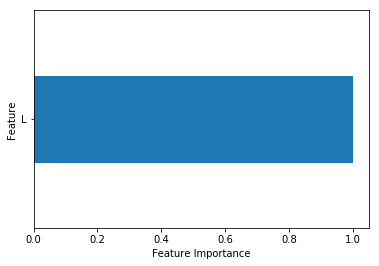

In [209]:
print ('Fetures importances:{}'.format(tree.feature_importances_))
np.sum(tree.feature_importances_)

def plot_feature_imp_cancer(model):
    
    n_features=X.shape[1]
    array_i=np.arange(n_features)
    plt.barh(array_i, model.feature_importances_, align='center')
    plt.yticks(array_i, 'Level')
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    plt.ylim(-1,n_features)
    
plot_feature_imp_cancer(tree)

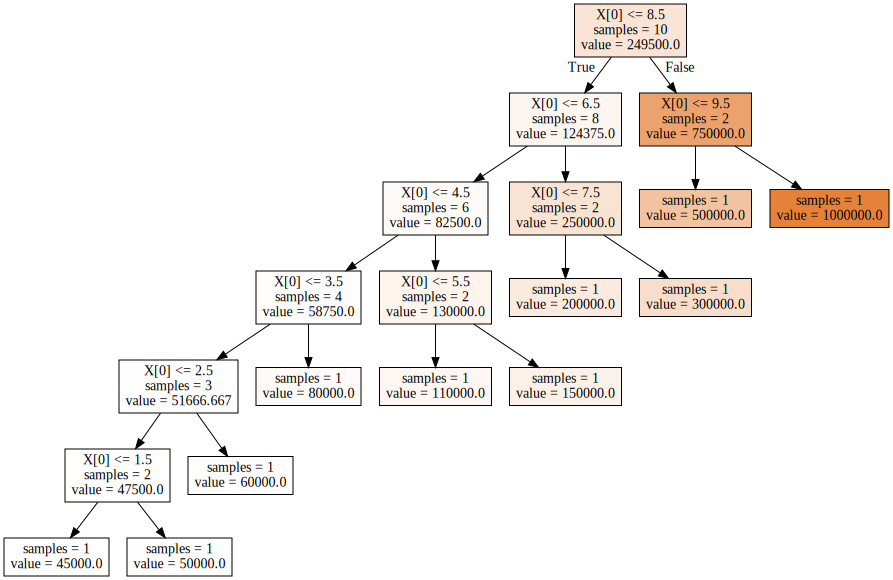

In [212]:
tree = DecisionTreeRegressor(max_depth=6,random_state=0)
tree.fit(X_train, y_train)

from sklearn.tree import export_graphviz
import graphviz

export_graphviz(tree, out_file='tree.dot',impurity=False, filled=True)

with open('tree.dot') as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

In [207]:
print('Training set score:{:.3f}\nTest set score:{:.3f}'.format(tree.score(X_train, y_train),tree.score(X_test, y_test)))

Training set score:0.600
Test set score:0.600


Training set score:1.000
Test set score:1.000


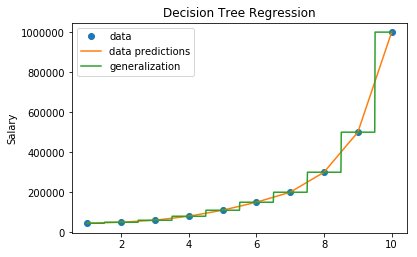

In [213]:
tree = DecisionTreeRegressor(splitter='best',random_state=0)
tree.fit(X_train, y_train)

X_grid=np.arange(min(X),max(X),0.01)
X_grid=X_grid.reshape(-1,1)

plt.plot(X,y,'o')
plt.plot(X,tree.predict(X))
plt.plot(X_grid,tree.predict(X_grid),)
# plt.xticks(dataset.iloc[:,0], rotation=90)
plt.title('Decision Tree Regression')
plt.ylabel(dataset.columns[-1])
plt.subplots_adjust(bottom=0.15)
plt.legend(['data','data predictions', 'generalization'])

print('Training set score:{:.3f}\nTest set score:{:.3f}'.format(tree.score(X_train, y_train),tree.score(X_test, y_test)))

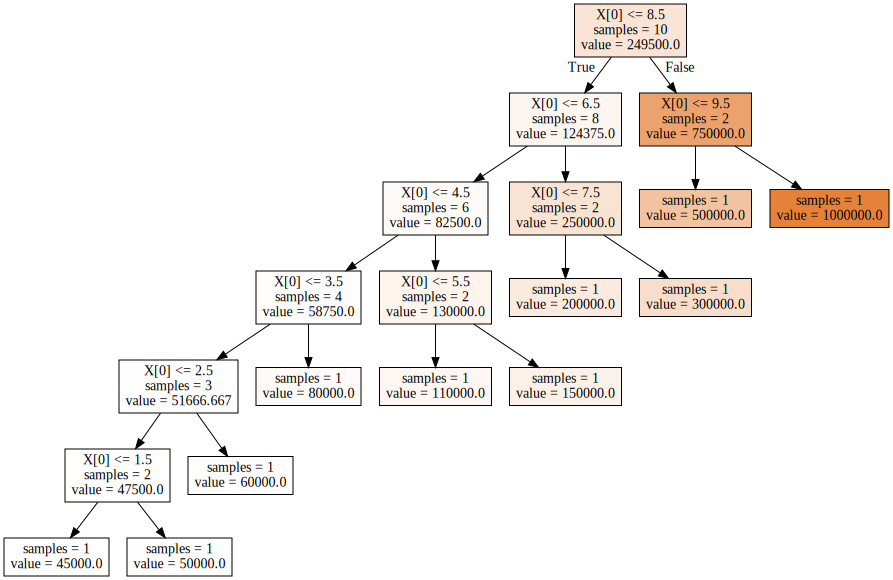

In [214]:
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(tree, out_file='tree.dot',impurity=False, filled=True)

with open('tree.dot') as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))


In [215]:
# for i,j in zip(X_grid,tree.predict(X_grid)):
#     print('test: {:.2f} - pred.:{}'.format(i[0],j))

dados={'X_grid':X_grid.reshape(1,-1)[0], 'predict_grid':tree.predict(X_grid).reshape(1,-1)[0]}   

df_analysis= pd.DataFrame(data=dados)
df_analysis.X_grid=df_analysis.X_grid.apply(lambda x: round(x, 2))
df_analysis=df_analysis.merge(dataset,how='left',left_on='X_grid', right_on='Level')
df_analysis.fillna(method='ffill', inplace=True)

df_analysis['diff']=df_analysis['Salary']-df_analysis['predict_grid']
df_analysis['predict_grid'].unique()

C:\Users\fabio\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:938: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation
  'representation', UserWarning)


array([  45000.,   50000.,   60000.,   80000.,  110000.,  150000.,
        200000.,  300000.,  500000., 1000000.])

   # Random Forest

Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Random decision forests correct for decision trees' habit of overfitting to their training set.

- Adress the problem of overfiting by using a simple decision tree. Inject randomness into the tree building to ensure each tree is different
- Boostrap sample : for each n_samples repeatedly, it draws an example with randomly replacement>>> datset has the same legnht of the original datset, but some points will be missing - and some others will be repeated.
ex: [1,2,3,4] ---> ans: [2,2,3,4]
- In each node the algo. randomly selects a subset of the features, and it looks for the best possible test involving one of these features. These two different steps (bootstramp abd feature selection) ensure that all trees are different (random forest)
- max_features > crucial parameter. Number of features used. high max_features> trees will be quite similar. low max_features> trees quite different (need to have high max_depth)
- classification (make a prediction fo every tree: soft voting strategy. Each algorithm makes a soft prediction + probability. The probabilities are all averaged - the class with the highest probability is predicted) and regression (it takes the average of the trees) 

In [137]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split as tts
import mglearn.plots

In [189]:
## CASE 2 - SALARY PREDICTION ##

dataset=pd.read_csv(r'../../Data Science/Cursos Online/Udemy/Machine-Learning-A-Z-New/Machine Learning A-Z New/Part 2 - Regression/Section 8 - Decision Tree Regression/Position_Salaries.csv')

X=dataset.iloc[:,1:2].values
y=dataset.iloc[:,-1].values

X_train, X_test, y_train, y_test= X,X,y,y

scores=[]

for estimator in range(1,100):
    tree = RandomForestRegressor(n_estimators=estimator, random_state=0)
    tree.fit(X_train, y_train)
    scores.append(tree.score(X_train, y_train))
#     print('Estimators {}\nTraining set score:{:.3f}\nTest set score:{:.3f}\n'.format(estimator,tree.score(X_train, y_train),tree.score(X_test, y_test)))

Text(0, 0.5, 'score')

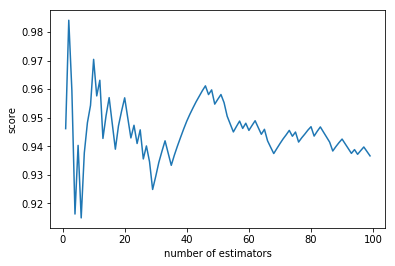

In [190]:
plt.plot(np.arange(1,100),scores)
plt.xlabel('number of estimators')
plt.ylabel('score')

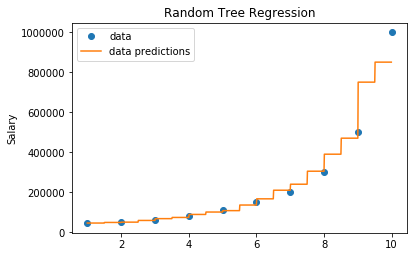

In [191]:
trees = RandomForestRegressor(n_estimators=10, random_state=0)
trees.fit(X_train, y_train)

plt.plot(X,y,'o')
# plt.plot(X,trees.predict(X))
plt.plot(X_grid,trees.predict(X_grid),)
# plt.xticks(dataset.iloc[:,0], rotation=90)
plt.title('Random Tree Regression')
plt.ylabel(dataset.columns[-1])
plt.subplots_adjust(bottom=0.15)
plt.legend(['data','data predictions', 'generalization'])

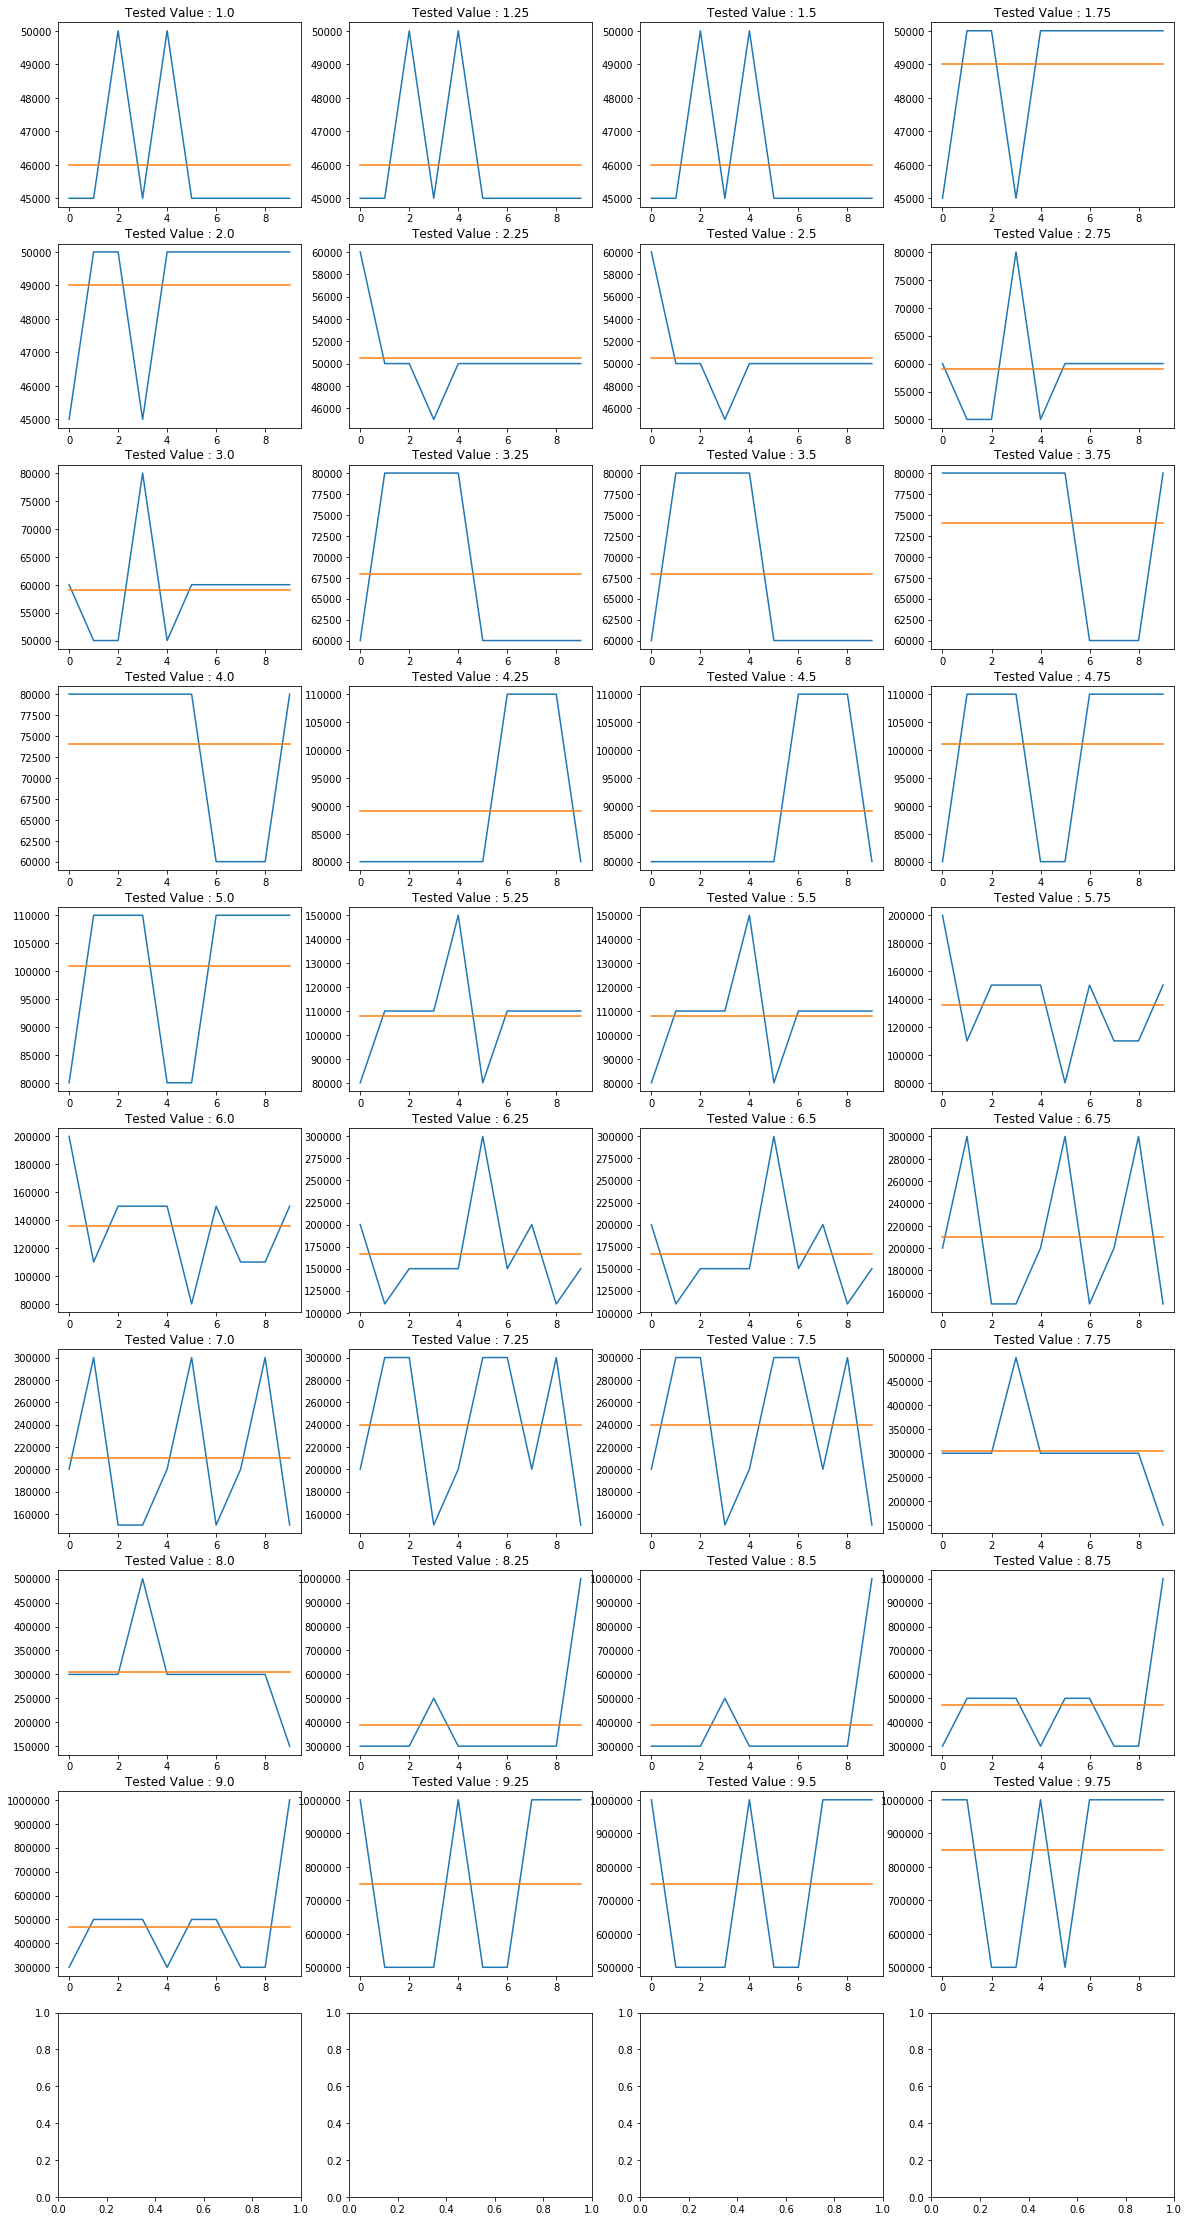

In [192]:
# tested_value=

fig, axes= plt.subplots(10,4,figsize=(20,40))

for i,ax in zip(np.arange(1,10,0.25),axes.ravel()):
    tested_value=i
    decision=trees.predict([[tested_value]])*np.ones(len(trees.estimators_))
    pred= []
    for j in range(len(trees.estimators_)):
        pred.append(trees.estimators_[j].predict([[tested_value]]))
        ind=np.arange(len(trees.estimators_))

    ax.plot(ind,pred)
    ax.plot(ind,decision)
#     ax.set_xlabel('Trees')
#     ax.set_ylabel('Pred.')
    ax.set_title('Tested Value : {}'.format(i))

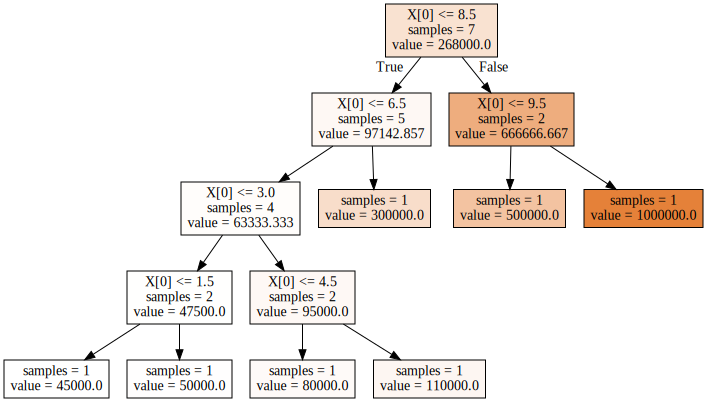

In [218]:
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(trees.estimators_[1], out_file='tree.dot',impurity=False, filled=True)

with open('tree.dot') as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

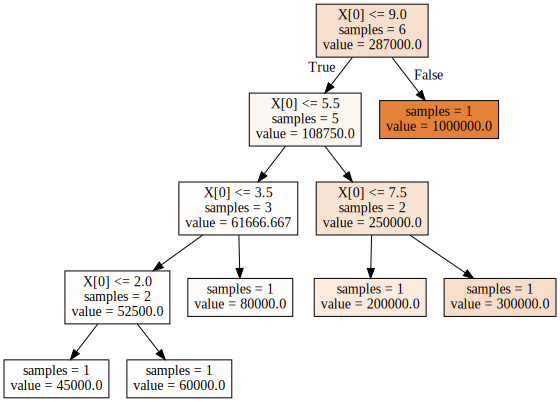

In [219]:
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(trees.estimators_[0], out_file='tree.dot',impurity=False, filled=True)

with open('tree.dot') as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

In [217]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

In [42]:
## CASE 1 - MAKE MOONS ##

X,y= make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test= tts(X,y,stratify=y, random_state=42)

Text(0.5, 0, 'feature 2')

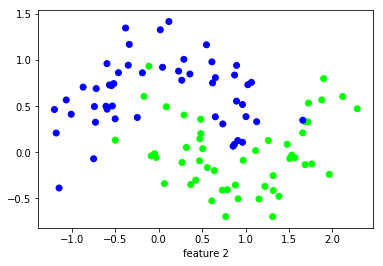

In [56]:
plt.scatter(X[:,0],X[:,1], c=y, cmap='brg')
plt.xlabel('feature 1')
plt.xlabel('feature 2')

In [59]:
trees = RandomForestClassifier(n_estimators=5, random_state=0)
trees.fit(X_train, y_train)
print('Training set score:{:.3f}\nTest set score:{:.3f}'.format(trees.score(X_train, y_train),trees.score(X_test, y_test)))

Training set score:0.973
Test set score:0.880


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F98B02D908>,
      dtype=object)

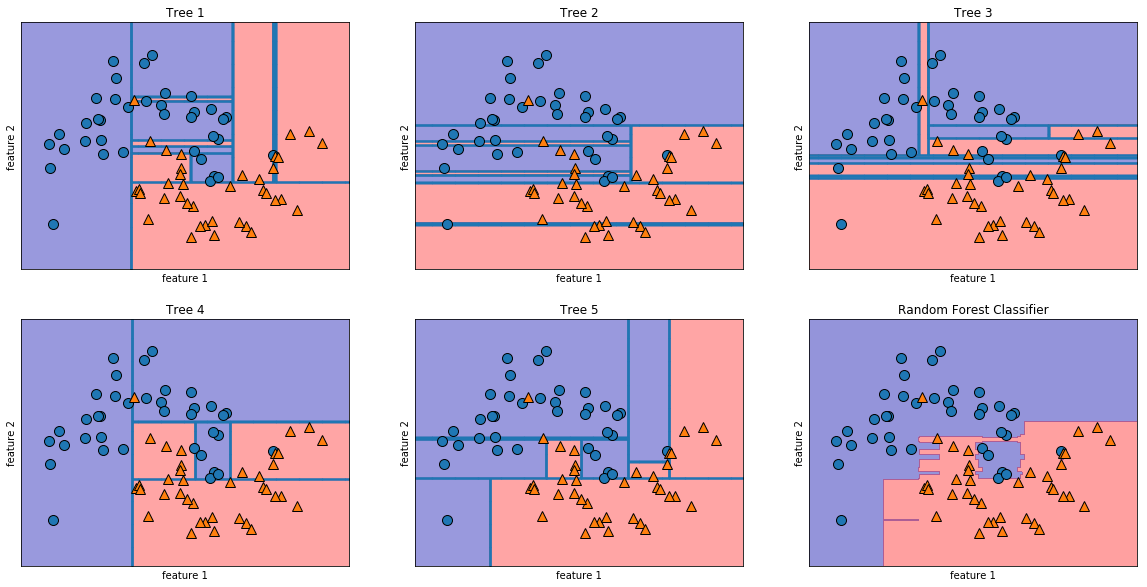

In [115]:
fig, axes= plt.subplots(2,3,figsize=(20,10))

for i,(ax,tree) in enumerate(zip(axes.ravel(),trees.estimators_)):
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)
    mglearn.plots.plot_2d_separator(trees, X_train, fill=True, ax=axes[-1,-1], alpha=.1)
    ax.set_xlabel('feature 1')
    ax.set_ylabel('feature 2')
    ax.set_title('Tree {}'.format(i+1))
    
# axes[-1][-1].mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
axes[-1][-1].set_title('Random Forest Classifier')
axes[-1][-1].set_xlabel('feature 1')
axes[-1][-1].set_ylabel('feature 2')

mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)

trees.estimators_

axes

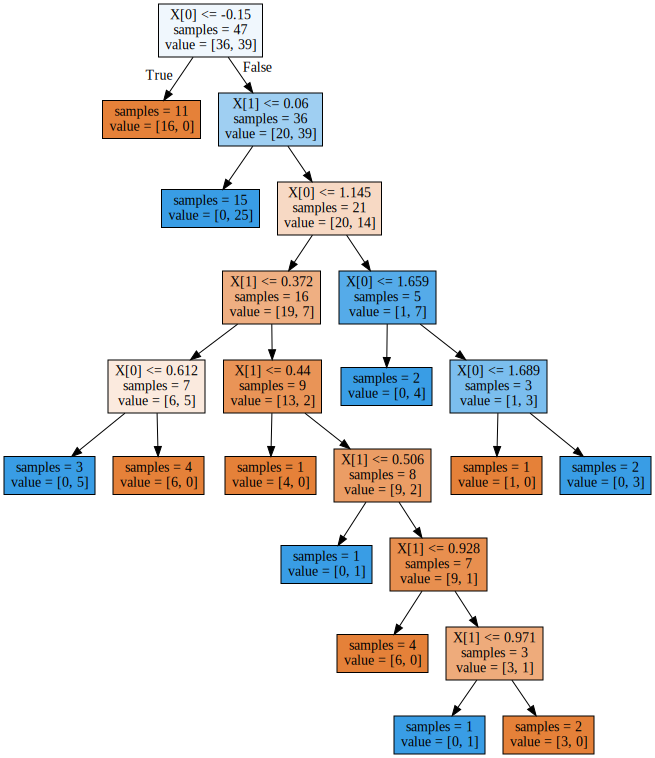

In [108]:
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(trees.estimators_[0], out_file='tree.dot',impurity=False, filled=True)

with open('tree.dot') as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))